# **PCA**







#Step 1 : import libraries

In [1]:
import pandas as pd
import numpy as np
# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,auc,roc_curve,RocCurveDisplay


#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [2]:
# instantiating
X,y = load_wine(return_X_y=True)

#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [4]:
X_train_mean = X_train.mean()

X_train_std = X_train.std()

Z_train = (X_train - X_train_mean) / X_train_std


X_test_mean = X_test.mean()

X_test_std = X_test.std()

Z_test = (X_test - X_test_mean) / X_test_std


pca_train = PCA(n_components=2)
pca_train.fit(Z_train)

pca_test = PCA(n_components=2)
pca_test.fit(Z_test)

PCA(n_components=2)

#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




In [5]:
x_train_pca = pca_train.transform(Z_train)

df_pca1_train = pd.DataFrame(x_train_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(2)])

x_test_pca = pca_test.transform(Z_test)

df_pca1_test = pd.DataFrame(x_test_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(2)])

#Step 6: Fitting Logistic Regression To the training set




In [6]:
lr_model = LogisticRegression()
lr_model.fit(df_pca1_train, y_train)

LogisticRegression()

#Step 7: Predicting the test set result




In [7]:
lr_pred = lr_model.predict(df_pca1_test)

#Step 8: Making the confusion matrix




In [8]:
print(confusion_matrix(y_test, lr_pred))

[[12  0  2]
 [ 0 14  0]
 [ 0  5  3]]


#Step 9: Predicting the training set result




In [9]:
lr_pred_train = lr_model.predict(df_pca1_train)

#Step 10: Visualizing the Test set results




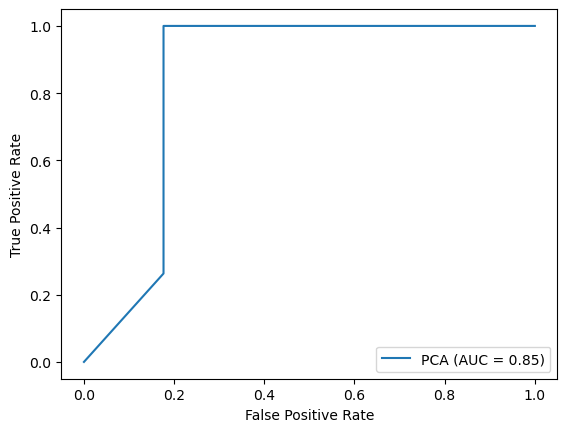

In [10]:
fpr, tpr, thresholds = roc_curve(lr_pred,y_test,pos_label=1)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='PCA')
display.plot()

#**Well Done :)**
Now let's practice!